<h1>Inhaltsverzeichnis<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Einleitung" data-toc-modified-id="Einleitung-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Einleitung</a></span></li><li><span><a href="#Verwendeter-Datensatz" data-toc-modified-id="Verwendeter-Datensatz-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Verwendeter Datensatz</a></span></li><li><span><a href="#Daten-einlesen" data-toc-modified-id="Daten-einlesen-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Daten einlesen</a></span></li><li><span><a href="#Spalten-selektieren,-Daten-plotten" data-toc-modified-id="Spalten-selektieren,-Daten-plotten-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Spalten selektieren, Daten plotten</a></span></li><li><span><a href="#Daten-normalisieren" data-toc-modified-id="Daten-normalisieren-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Daten normalisieren</a></span></li><li><span><a href="#Trainings--und-Testdaten-definieren" data-toc-modified-id="Trainings--und-Testdaten-definieren-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Trainings- und Testdaten definieren</a></span></li><li><span><a href="#MLP-vorbereiten" data-toc-modified-id="MLP-vorbereiten-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>MLP vorbereiten</a></span></li><li><span><a href="#MLP-trainieren" data-toc-modified-id="MLP-trainieren-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>MLP trainieren</a></span></li><li><span><a href="#Modell-testen/anwenden" data-toc-modified-id="Modell-testen/anwenden-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Modell testen/anwenden</a></span></li><li><span><a href="#Modell-speichern" data-toc-modified-id="Modell-speichern-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Modell speichern</a></span></li><li><span><a href="#Modell-wiederherstellen-und-anwenden" data-toc-modified-id="Modell-wiederherstellen-und-anwenden-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Modell wiederherstellen und anwenden</a></span></li></ul></div>

# Einleitung

In diesem Jupyter-Notebook durchlaufen wir alle relevanten Schritte des Machine-Learnings:
1. Daten einlesen
2. Daten vorverarbeiten
3. Trainings- und Testdaten vorbereiten
4. Machine-Learning Modell definieren (hier: ein MLP)
5. Modell trainieren
6. Modell testen/anwenden
7. Modell speichern/wiederherstellen

# Verwendeter Datensatz

Wir wollen mit realen Daten arbeiten. Bei [Kaggle](https://www.kaggle.com/) können wir viele Datensätze finden. Diesen hier verwenden wir im Folgenden:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Der Datensatz enthält in den Trainingsdaten 1460 Beispiele von Häusern, wobei deren Eigenschaften und deren jeweiliger tatsächlicher Verkaufspreis aufgeführt ist.

# Daten einlesen

Die Datensätze liegen often als .csv Dateien vor. Diese können mittels der Bibliothek Pandas einfach eingelesen werden.

Wenn Pandas noch installiert ist, kann diese Bibliothek mittels

    pip install pandas

unter der Anaconda Prompt installiert werden.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [2]:
import pandas as pd
print(pd.__version__)

1.0.3


In [4]:
df = pd.read_csv("daten/hausbeispiele.csv")

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [7]:
df[0:3]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [8]:
df.shape

(1460, 81)

In [9]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Spalten selektieren, Daten plotten

In [10]:
df["YearBuilt"]

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [11]:
df["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [12]:
x = df["YearBuilt"]
y = df["SalePrice"]

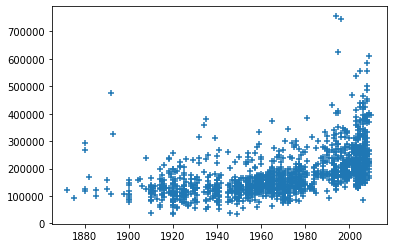

In [13]:
import matplotlib.pyplot as plt
plt.scatter(x,y, marker="+")
plt.show()

In [14]:
data_input = df[["YearBuilt", "LotArea"]].values
#data_input = df[["YearBuilt", "LotArea", "OverallQual"]].values

nr_inputs = data_input.shape[1]

In [15]:
nr_inputs

2

In [16]:
data_input

array([[ 2003,  8450],
       [ 1976,  9600],
       [ 2001, 11250],
       ...,
       [ 1941,  9042],
       [ 1950,  9717],
       [ 1965,  9937]])

In [17]:
data_output = df["SalePrice"].values

In [18]:
data_output

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

# Daten normalisieren

In [19]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler_input = MinMaxScaler(feature_range=(0, 1))
scaled_input_data = scaler_input.fit_transform(data_input)

In [21]:
scaled_input_data

array([[0.94927536, 0.0334198 ],
       [0.75362319, 0.03879502],
       [0.93478261, 0.04650728],
       ...,
       [0.5       , 0.03618687],
       [0.56521739, 0.03934189],
       [0.67391304, 0.04037019]])

In [22]:
type(scaled_input_data)

numpy.ndarray

In [23]:
scaler_output = MinMaxScaler(feature_range=(0, 1))
scaled_output_data = scaler_output.fit_transform(data_output.reshape(-1,1))

In [24]:
scaled_output_data

array([[0.24107763],
       [0.20358284],
       [0.26190807],
       ...,
       [0.321622  ],
       [0.14890293],
       [0.15636717]])

# Trainings- und Testdaten definieren

In [25]:
x_train = scaled_input_data[0:1000]
y_train = scaled_output_data[0:1000]
x_test  = scaled_input_data[1000:]
y_test  = scaled_output_data[1000:]

In [26]:
x_train.shape

(1000, 2)

In [27]:
y_train.shape

(1000, 1)

In [28]:
x_test.shape

(460, 2)

In [29]:
y_test.shape

(460, 1)

In [30]:
print(x_train[0], "-->", y_train[0])

[0.94927536 0.0334198 ] --> [0.24107763]


# MLP vorbereiten

In [31]:
from tensorflow import keras

tf.keras.backend.clear_session()

model = keras.Sequential()
model.add(keras.layers.Dense(10,
                             activation="relu",
                             input_shape=(nr_inputs,)))
model.add(keras.layers.Dense(1,
                             activation="linear"))

In [32]:
model.compile(optimizer='sgd',               
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [33]:
model.build()

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


# MLP trainieren

In [35]:
history = model.fit(x_train,
                    y_train,
                    epochs=200)

Train on 1000 samples
Epoch 1/200
1000/1000 [==============================] - 0s 412us/sample - loss: 0.0431 - accuracy: 0.0010
Epoch 2/200
1000/1000 [==============================] - 0s 105us/sample - loss: 0.0155 - accuracy: 0.0010
Epoch 3/200
1000/1000 [==============================] - 0s 96us/sample - loss: 0.0121 - accuracy: 0.0010
Epoch 4/200
1000/1000 [==============================] - 0s 161us/sample - loss: 0.0117 - accuracy: 0.0010
Epoch 5/200
1000/1000 [==============================] - 0s 146us/sample - loss: 0.0116 - accuracy: 0.0010
Epoch 6/200
1000/1000 [==============================] - 0s 119us/sample - loss: 0.0115 - accuracy: 0.0010
Epoch 7/200
1000/1000 [==============================] - 0s 115us/sample - loss: 0.0114 - accuracy: 0.0010
Epoch 8/200
1000/1000 [==============================] - 0s 121us/sample - loss: 0.0114 - accuracy: 0.0010
Epoch 9/200
1000/1000 [==============================] - 0s 153us/sample - loss: 0.0113 - accuracy: 0.0010
Epoch 10/200
100

# Modell testen/anwenden

In [36]:
preds = model.predict(x_test)

In [37]:
preds.shape

(460, 1)

In [38]:
preds[0:5]

array([[0.16794443],
       [0.10868789],
       [0.2686156 ],
       [0.21263239],
       [0.26711538]], dtype=float32)

In [39]:
preds_dollar = scaler_output.inverse_transform( preds )

In [40]:
preds_dollar.shape

(460, 1)

In [41]:
preds_dollar[:10]

array([[155836.78],
       [113166.15],
       [228330.1 ],
       [188016.58],
       [227249.78],
       [189599.89],
       [179896.75],
       [180657.2 ],
       [225627.88],
       [121189.94]], dtype=float32)

In [42]:
gt_dollar = scaler_output.inverse_transform( y_test )

In [43]:
gt_dollar.shape

(460, 1)

In [44]:
gt_dollar[:10]

array([[ 82000.],
       [ 86000.],
       [232000.],
       [136905.],
       [181000.],
       [149900.],
       [163500.],
       [ 88000.],
       [240000.],
       [102000.]])

In [45]:
nr_tests = len(y_test)
sum_errors = 0.0
for i in range(0,nr_tests):
    error = gt_dollar[i] - preds_dollar[i]
    print("{0} vs {1} --> Fehler: {2}"
          .format(preds_dollar[i],
                  gt_dollar[i],
                  error ))
    sum_errors += abs(error)
print("Durchschnittlicher Fehler in $:", sum_errors/nr_tests)

[155836.78] vs [82000.] --> Fehler: [-73836.78125]
[113166.15] vs [86000.] --> Fehler: [-27166.1484375]
[228330.1] vs [232000.] --> Fehler: [3669.90625]
[188016.58] vs [136905.] --> Fehler: [-51111.578125]
[227249.78] vs [181000.] --> Fehler: [-46249.78125]
[189599.89] vs [149900.] --> Fehler: [-39699.890625]
[179896.75] vs [163500.] --> Fehler: [-16396.75]
[180657.2] vs [88000.] --> Fehler: [-92657.203125]
[225627.88] vs [240000.] --> Fehler: [14372.125]
[121189.94] vs [102000.] --> Fehler: [-19189.9375]
[149609.16] vs [135000.] --> Fehler: [-14609.15625]
[173350.28] vs [100000.] --> Fehler: [-73350.28125]
[116803.72] vs [165000.] --> Fehler: [48196.28125]
[99578.93] vs [85000.] --> Fehler: [-14578.9296875]
[150345.44] vs [119200.] --> Fehler: [-31145.4375]
[221877.52] vs [227000.] --> Fehler: [5122.484375]
[214886.27] vs [203000.] --> Fehler: [-11886.265625]
[199211.25] vs [187500.] --> Fehler: [-11711.25]
[208245.61] vs [160000.] --> Fehler: [-48245.609375]
[227253.45] vs [213490.] 

# Modell speichern

In [46]:
fname1 = "hauspreis_schaetzer.h5"
model.save(fname1)

In [47]:
import pickle
fname2 = "scaler_output.pkl"
fobj = open(fname2, "wb")
pickle.dump(scaler_output, fobj)
fobj.close()

# Modell wiederherstellen und anwenden

In [48]:
new_model = keras.models.load_model(fname1)

In [49]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [50]:
import pickle
fobj = open(fname2, "rb")
scaler = pickle.load(fobj)

In [51]:
type(scaler)

sklearn.preprocessing._data.MinMaxScaler

In [52]:
test_sample = np.array( [[0.94927536, 0.0334198 ]] )

In [53]:
test_sample.shape

(1, 2)

In [54]:
pred = new_model.predict( test_sample )

In [55]:
pred

array([[0.2633851]], dtype=float32)

In [56]:
scaler.inverse_transform( pred )

array([[224563.6]], dtype=float32)